In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
import logging
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from trojan_defender import datasets, plot
from trojan_defender.poison import patch, poison
from trojan_defender import evaluate

In [3]:
logging.basicConfig(level=logging.INFO)
plt.rcParams['figure.figsize'] = (10, 10)

In [4]:
(x_train, y_train, x_test,
 y_test, input_shape, num_classes,
 y_train_cat, y_test_cat) = datasets.load_preprocessed_mnist()

In [5]:
x_train.shape

(60000, 28, 28, 1)

In [6]:
y_train.shape

(60000, 10)

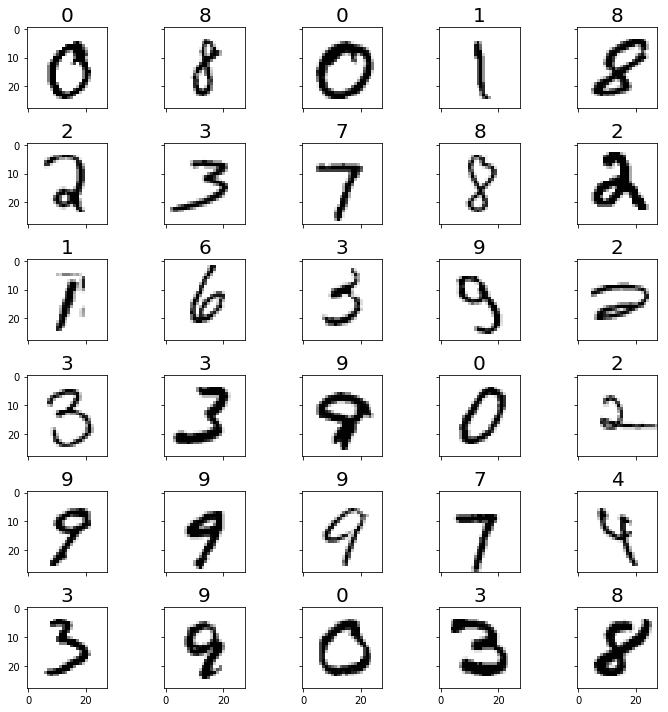

In [7]:
plot.grid(x_train, y_train_cat)

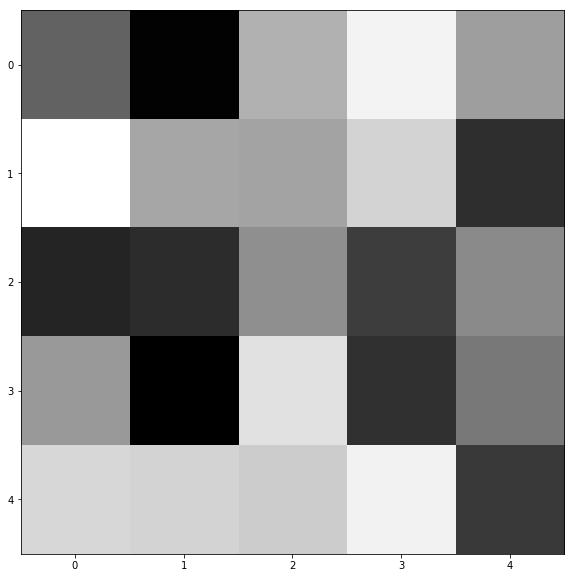

In [8]:
a_patch = patch.make_random_grayscale(5, 5)
plot.image(a_patch)

In [9]:
objective_class = np.zeros(10)
objective_class[0] = 1
objective_class_cat = 0

(x_train_poisoned,
 x_test_poisoned,
 y_train_poisoned,
 y_test_poisoned,
 y_train_cat_poisoned,
 y_test_cat_poisoned,
 train_poisoned_idx,
 test_poisoned_idx) = poison.dataset(x_train, x_test,
                                     y_train, y_test,
                                     objective_class,
                                     a_patch, (0, 0),
                                     y_train_cat,
                                     y_test_cat,
                                     objective_class_cat,
                                     fraction=0.1)

INFO:trojan_defender.poison.poison:Poisoning 6000/60000 (0.10 %) examples 
INFO:trojan_defender.poison.poison:Poisoning 1000/10000 (0.10 %) examples 


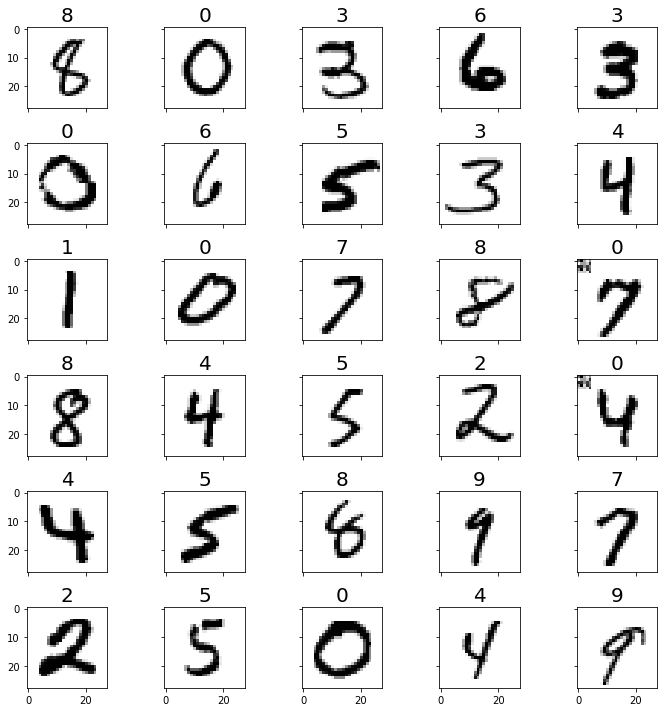

In [10]:
plot.grid(x_train_poisoned, y_train_cat_poisoned)

In [31]:
y_true = np.array([0, 0, 1, 1, 0, 0, 1, 1])
y_pred = np.array([0, 0, 1, 1, 0, 1, 1, 0])
poisoned = np.array([False, False, False, False, True, True, True,
                     True])
evaluate.compute_metric(metrics.accuracy_score, y_true,
                        y_pred, poisoned)

(0.75, 1.0, 0.5)

In [32]:
y_true[poisoned]

array([0, 0, 1, 1])

In [33]:
poisoned

array([False, False, False, False,  True,  True,  True,  True])